In [1]:
#INCLUDING ALL THE LIBRARIES

#for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#for training and testing the data model(random forest)
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#IMPORTING THE DATASETabs
anime_data = pd.read_csv('anime.csv')

# Understanding the data

In [3]:
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
#checking out the first ten value of the dataset
anime_data.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [5]:
#checking out the last ten value of the dataset
anime_data.tail(10)

,anime_id,name,genre,type,episodes,rating,members
12284,26031,Super Erotic Anime,Hentai,OVA,2,4.45,118
12285,34399,Taimanin Asagi 3,"Demons, Hentai, Supernatural",OVA,Unknown,NaN,485
12286,10368,Teleclub no Himitsu,Hentai,OVA,2,4.67,148
12287,9352,Tenshi no Habataki Jun,Hentai,OVA,1,4.33,201
12288,5541,The Satisfaction,Hentai,OVA,1,4.37,166
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [6]:
#checking the shape of our data
anime_data.shape

(12294, 7)

In [7]:
nrow1 = anime_data.shape[0]
nrow1

12294

In [8]:
anime_data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [9]:
anime_data.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [10]:
#Checking the unique values
anime_data.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

In [11]:
#checking the unique values of each column of the dataset

clmList = list(anime_data.columns)
for ele in clmList:
    print(f"{ele} : \n",anime_data[f'{ele}'].unique(),'\n')

anime_id : 
 [32281  5114 28977 ...  5621  6133 26081] 

name : 
 ['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!'] 

genre : 
 ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life'] 

type : 
 ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan] 

episodes : 
 ['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '155' '104' '1

In [12]:
#Checking the datatypes  of the attributes in the dataset
anime_data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

# Cleaning the data

In [13]:
#checking for the null values in the dataset
anime_data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [14]:
#As we've null values/entries in our dataset we've to remove those value from our dataset
nd = anime_data.isnull().values.any()
if nd == True:
    print('DataSet contains null entris... Dropping all the null entries...')
    anime_data = anime_data.dropna()
else:
    print('DataSet does not contains any null entries.')

DataSet contains null entris... Dropping all the null entries...


In [15]:
#Now we do not have any null entries in our dataset
anime_data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [16]:
nrow2 = anime_data.shape[0]
nrow2

12017

In [17]:
#No of rows dropped after removing all the null entries
print(f'Dropped rows: {nrow1-nrow2}')

Dropped rows: 277


In [18]:
#Updated dataset after cleaning of null values
anime_data.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


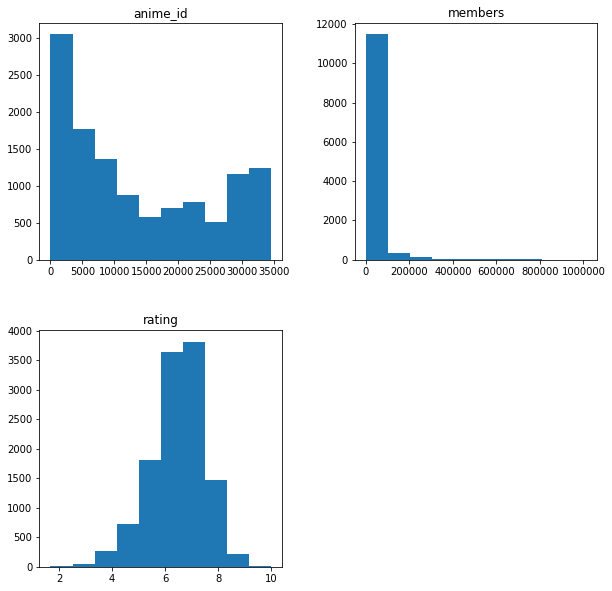

In [19]:
#Analysing the dataset through HISTOGRAM
anime_data.hist(figsize = (10,10), grid=False)
plt.show()

# Relationship Analysis

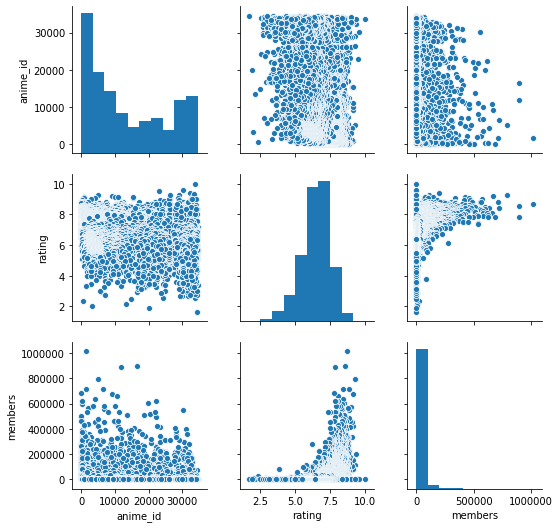

In [20]:
#Analysing relatinoship in the dataset through pairplots(visualising the relationship)

sns.pairplot(anime_data)

In [21]:
#CORRELATION MATRIX

correlation = anime_data.corr()
correlation

,anime_id,rating,members
anime_id,1.000000,-0.280954,-0.073964
rating,-0.280954,1.000000,0.388499
members,-0.073964,0.388499,1.000000


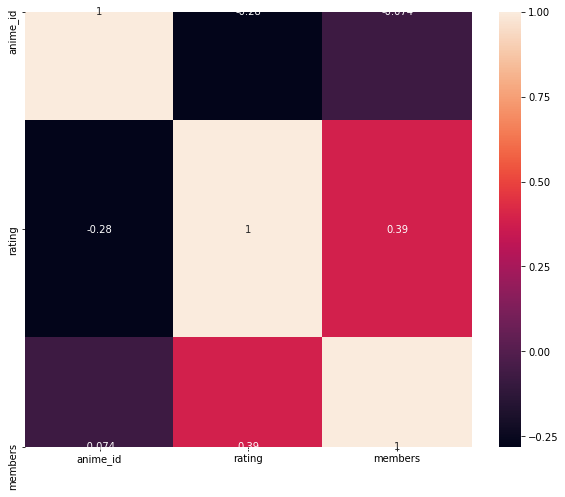

In [22]:
#HEAT MAP: (Putting the CORRELATION MATRIX into the HEAT MAP)
fig,ax = plt.subplots(figsize=(10,8))  
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, ax=ax)

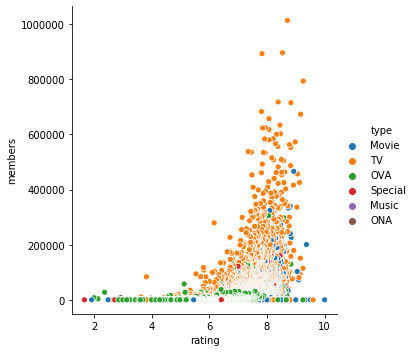

In [23]:
#SCATTER PLOT:

sns.relplot(x='rating', y='members', hue='type', data=anime_data )

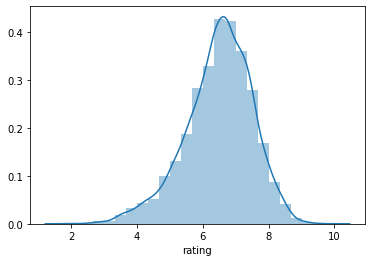

In [24]:
#DISTPOT for rating
sns.distplot(anime_data['rating'], bins=25)

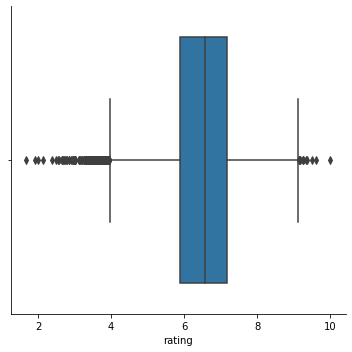

In [26]:
#CATEGORICAL PLOT:

sns.catplot(x='rating', kind='box', data=anime_data)

# Mean, Median, Standard Deviation

In [27]:
#finding mean
print(f'MEAN:\n\n{anime_data.mean()}\n\n\n')

#finding median
print(f'MEDIAN:\n\n{anime_data.median()} \n\n\n')

#finding standard deviation
print(f'STANDARD DEVIATION:\n\n{anime_data.std()}\n\n\n')

MEAN:

anime_id    13638.001165
rating          6.478264
members     18348.879005
dtype: float64



MEDIAN:

anime_id    9959.00
rating         6.57
members     1552.00
dtype: float64 



STANDARD DEVIATION:

anime_id    11231.076675
rating          1.023857
members     55372.496436
dtype: float64





# Label Encoding

In [28]:
#Checking the datatype for current dataset
anime_data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [29]:
#LABEL ENCODING

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

for lp in clmList:
    if anime_data[f'{lp}'].dtype == 'object':
        anime_data[f'{lp}'] = labelencoder_X.fit_transform(anime_data[f'{lp}'])

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
anime_data.dtypes

anime_id      int64
name          int64
genre         int64
type          int64
episodes      int64
rating      float64
members       int64
dtype: object

# Training the model

In [61]:
# features  = ['name','genre','type','episodes','members']
# X = anime_data[features]
# Y = anime_data.rating

# #creating the training and testing data

# train_X,val_X,train_Y,val_Y = train_test_split(X,Y,random_state = 0)

# #defining the model

# anime_model = RandomForestRegressor(random_state=1)

# #training the model 

# anime_model.fit(train_X,train_Y)

# predictions = anime_model.predict(val_X)
# print('Predictions: ',predictions)
# print('THE ERROR IN PREDICTING THE RESULTS: ',mean_absolute_error(val_Y,predictions))